In [4]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# 1

In [2]:
data = pd.read_csv('../data/blobs2.csv')

In [7]:
x, y = data[['x', 'y']].values, data.label.values

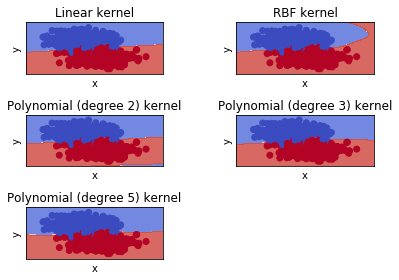

In [19]:
C = 1.0  # SVM regularization parameter
h = .02  # step size in the mesh
svc = svm.SVC(kernel='linear', C=C).fit(x, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(x, y)
poly_svc_2 = svm.SVC(kernel='poly', degree=2, C=C).fit(x, y)
poly_svc_3 = svm.SVC(kernel='poly', degree=3, C=C).fit(x, y)
poly_svc_5 = svm.SVC(kernel='poly', degree=5, C=C).fit(x, y)

# create a mesh to plot in
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['Linear kernel',
          'RBF kernel',
          'Polynomial (degree 2) kernel',
          'Polynomial (degree 3) kernel',
          'Polynomial (degree 5) kernel']


for i, clf in enumerate((svc, rbf_svc, poly_svc_2, poly_svc_3, poly_svc_5)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(wspace=1, hspace=1)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.tight_layout()
plt.show()

# 2

In [26]:
data = pd.read_csv('../data/cancer.csv')
data.label = data.label.apply(lambda x: 1 if x == 'M' else 0)
x, y = data.drop('label', axis=1).values, data.label.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
def accuracy(y_true, y_pred):
    assert len(y_true) == len(y_pred)  
    return (y_true == y_pred).sum() / len(y_true)

In [35]:
%%time
svc = svm.SVC(kernel='linear', C=C).fit(x_train, y_train)
y_pred = svc.predict(x_test)

Wall time: 7.94 s


In [38]:
# svm
accuracy(y_test, y_pred)

0.956140350877193

In [39]:
%%time
clf = RandomForestClassifier(random_state=0).fit(x_train, y_train)
y_pred = clf.predict(x_test)

Wall time: 933 ms


In [40]:
# лес
accuracy(y_test, y_pred)

0.9649122807017544

In [ ]:
# надеюсь, это "близкая точность"

In [41]:
data = pd.read_csv('../data/spam.csv')
x, y = data.drop('label', axis=1).values, data.label.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [43]:
%%time
svc = svm.SVC(kernel='linear', C=C).fit(x_train, y_train)
y_pred = svc.predict(x_test)

Wall time: 17min 29s


In [44]:
# svm
accuracy(y_test, y_pred)

0.9229098805646037

In [45]:
%%time
clf = RandomForestClassifier(random_state=0).fit(x_train, y_train)
y_pred = clf.predict(x_test)

Wall time: 1.58 s


In [46]:
# лес
accuracy(y_test, y_pred)

0.9533116178067318